---
<a href="https://colab.research.google.com/github/hc2x/civl4500/blob/main/tutorials/tutorial-5-1-nino34-sst.ipynb" target="_blank">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/>
</a>

# Instruction for Google Colab environment
- In order to make edits to this notebook, you should press File > "Save a Copy in Drive". This will ensure that any edits will be on your local copy, and they will not affect the notebook shared with everyone else.
- Click "Connect" on the top-right corner. Once you see RAM and Disk, you are ready to run the codes!

---

# **Niño Index and EOF analysis with SST data**

Prepared by Donghoon Lee (Donghoon.Lee@umanitoba.ca)

In this tutorial, we will explore
1. Creating the Niño 3.4 index from Sea Surface Temperature (SST) data

In [1]:
! pip install xarray numpy matplotlib cartopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Download SST data

In Google Colab, when you download a file using wget, the file is saved in the current working directory of the Colab environment, which is typically */content*. You can access this directory using standard file operations in Python or by using shell commands.

In this practice, we use the [NOAA Extended Reconstructed SST V5](https://psl.noaa.gov/data/gridded/data.noaa.ersst.v5.html), retreaving it from the NOAA PSL's FTP server.

In [2]:
!pwd
!ls -la

/content
total 119764
drwxr-xr-x 1 root root      4096 Nov 22 01:50 .
drwxr-xr-x 1 root root      4096 Nov 22 01:33 ..
drwxr-xr-x 4 root root      4096 Nov 20 14:25 .config
drwxr-xr-x 1 root root      4096 Nov 20 14:26 sample_data
-rw-r--r-- 1 root root 122620257 Nov 22 01:50 sst.mnmean.nc


In [3]:
# !wget ftp://ftp.cdc.noaa.gov/Datasets/COBE2/sst.mon.mean.nc
!wget ftp://ftp.cdc.noaa.gov/Datasets/noaa.ersst.v5/sst.mnmean.nc

--2024-11-22 02:47:20--  ftp://ftp.cdc.noaa.gov/Datasets/noaa.ersst.v5/sst.mnmean.nc
           => ‘sst.mnmean.nc.1’
Resolving ftp.cdc.noaa.gov (ftp.cdc.noaa.gov)... 140.172.38.117
Connecting to ftp.cdc.noaa.gov (ftp.cdc.noaa.gov)|140.172.38.117|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /Datasets/noaa.ersst.v5 ... done.
==> SIZE sst.mnmean.nc ... 122620257
==> PASV ... done.    ==> RETR sst.mnmean.nc ... done.
Length: 122620257 (117M) (unauthoritative)

sst.mnmean.nc.1     100%[===================>] 116.94M  34.9MB/s    in 3.7s    

2024-11-22 02:47:24 (32.0 MB/s) - ‘sst.mnmean.nc.1’ saved [122620257]



In [4]:
!ls -la

total 239512
drwxr-xr-x 1 root root      4096 Nov 22 02:47 .
drwxr-xr-x 1 root root      4096 Nov 22 01:33 ..
drwxr-xr-x 4 root root      4096 Nov 20 14:25 .config
drwxr-xr-x 1 root root      4096 Nov 20 14:26 sample_data
-rw-r--r-- 1 root root 122620257 Nov 22 01:50 sst.mnmean.nc
-rw-r--r-- 1 root root 122620257 Nov 22 02:47 sst.mnmean.nc.1


## Load data using Xarray
Next, we will load the NetCDF file as an Xarray Dataset and DataArray. Xarray is a powerful tool for working with multi-dimensional, labeled arrays, making it ideal for analyzing gridded data. For more details, please refer to the  [Xarray website](https://docs.xarray.dev/en/stable/).

In [5]:
import xarray as xr
ds = xr.open_dataset('sst.mnmean.nc')
ds

<xarray.Dataset> Size: 131MB
Dimensions:    (lat: 89, lon: 180, time: 2050, nbnds: 2)
Coordinates:
  * lat        (lat) float32 356B 88.0 86.0 84.0 82.0 ... -84.0 -86.0 -88.0
  * lon        (lon) float32 720B 0.0 2.0 4.0 6.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2024-10-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 33kB ...
    sst        (time, lat, lon) float32 131MB ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2024-11-03

In [6]:
da = ds['sst']
print(da)
print('----------'*10)
print(da.time)

<xarray.DataArray 'sst' (time: 2050, lat: 89, lon: 180)> Size: 131MB
[32841000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 16kB 1854-01-01 1854-02-01 ... 2024-10-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
----------------------------------------------------------------------------------------------------
<xarray.DataArray 'time' (time: 2050)> Size: 16kB
array(['1854-01-01T00:00:00.000000000', '1854-02-01T00:00:00.000000000',
       '1854-03-01T00:00:00.000000000', ..., '2024-08-01T00:00:00.000

## Visualize the latest SST and its anomaly

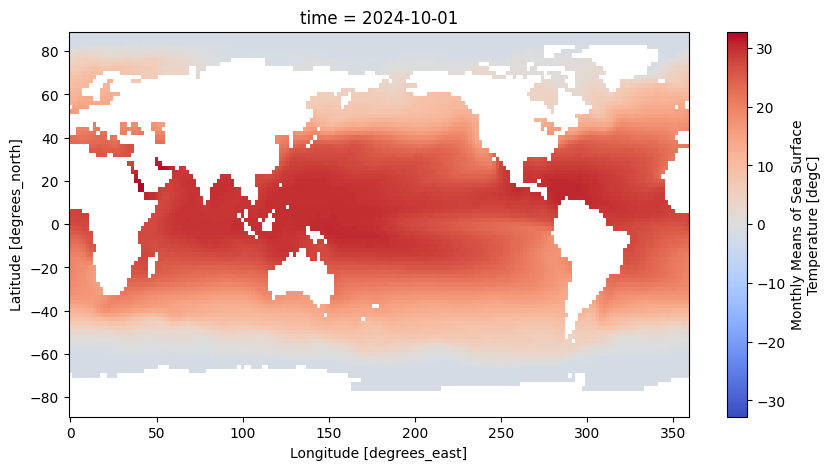

In [7]:
# Plot the latest SST
da.sel(time='2024-10-01').plot(figsize=(10, 5), cmap='coolwarm')

(240, 89, 180)
----------------------------------------------------------------------------------------------------
(89, 180)
----------------------------------------------------------------------------------------------------


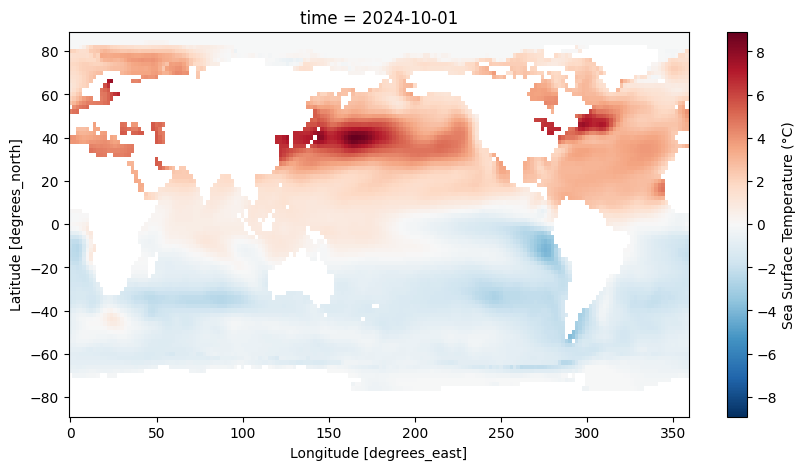

In [8]:
# Anomalies of the latest SST compared to the 1981-2000 average
base = da.sel(time=slice('1981-01-01', '2000-12-31'))
print(base.shape)
# print(base)
print('----------'*10)
base_mean = base.mean(dim='time')
print(base_mean.shape)
# print(base_mean)
print('----------'*10)
da_anom = da.sel(time='2024-10-01') - base_mean
da_anom.plot(figsize=(10, 5), cmap='RdBu_r', cbar_kwargs={'label': 'Sea Surface Temperature (°C)'})

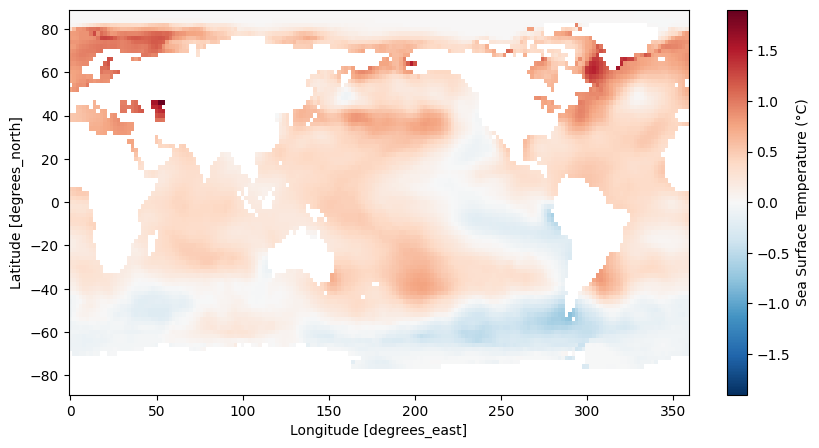

In [9]:
# Difference between 1981-2000 and 2001-2020
average_2020 = ds['sst'].sel(time=slice('2001-01-01', '2020-12-31')).mean(dim='time')
average_2000 = ds['sst'].sel(time=slice('1981-01-01', '2000-12-31')).mean(dim='time')
diff = average_2020 - average_2000
diff.plot(figsize=(10, 5), cmap='RdBu_r', cbar_kwargs={'label': 'Sea Surface Temperature (°C)'})

## Compute the Nino 3.4 index


>>
**Definition of Nino 3.4 Index ([source](https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni))**</br>


- Niño 3.4 (5N-5S, 170W-120W): The Niño 3.4 anomalies may be thought of as representing the average equatorial SSTs across the Pacific from about the dateline to the South American coast. The Niño 3.4 index typically uses a 5-month running mean, and El Niño or La Niña events are defined when the Niño 3.4 SSTs exceed +/- 0.4C for a period of six months or more.

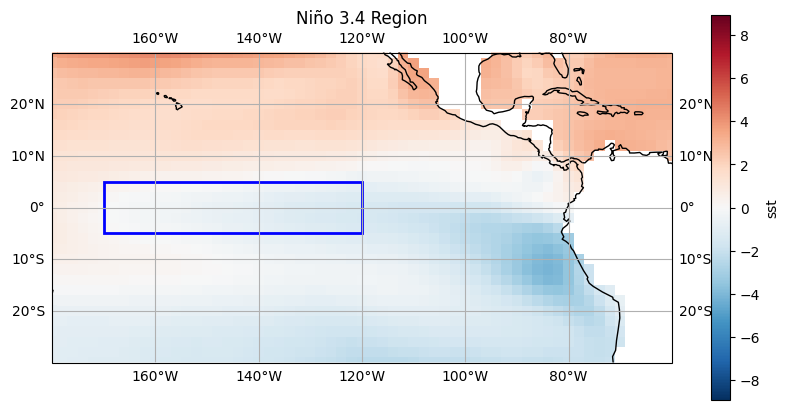

In [10]:
import xarray as xr
# Anomalies of the latest SST compared to the 1981-2000 average
da = xr.open_dataset('sst.mnmean.nc')['sst']
base = da.sel(time=slice('1981-01-01', '2000-12-31'))
base_mean = base.mean(dim='time')
da_anom = da.sel(time='2024-10-01') - base_mean

# Plotting the Niño 3.4 region (5N-5S, 170W-120W) on a map
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.set_extent([-180, -60, -30, 30], crs=ccrs.PlateCarree())
da_anom.plot(ax=ax, cmap='RdBu_r')

# Draw the Niño 3.4 box
nino34_box = plt.Rectangle((-170, -5), 50, 10, linewidth=2, edgecolor='b', facecolor='none', transform=ccrs.PlateCarree())
ax.add_patch(nino34_box)

# Add gridlines and titles
ax.gridlines(draw_labels=True)
ax.set_title('Niño 3.4 Region')
plt.show()

In [11]:
# Define the Niño 3.4 region
nino34_lon = slice(190, 240)  # 170°W to 120°W
nino34_lat = slice(5, -5)     # 5°N to 5°S

# Select the SST data for the Niño 3.4 region
nino34_sst = da.sel(lon=nino34_lon, lat=nino34_lat)

# Calculate the climatology (mean SST for each month)
climatology = nino34_sst.sel(time=slice('1981-01-01','2010-12-31')).groupby('time.month').mean(dim='time')

# Align the climatology with the time dimension of the original data for proper broadcasting
climatology_expanded = climatology.sel(month=nino34_sst['time.month'])

# Calculate the Niño 3.4 anomalies by subtracting the monthly climatology
nino34_anomalies = nino34_sst - climatology_expanded

# Compute the spatial average of the anomalies to get the Niño 3.4 index
nino34_index = nino34_anomalies.mean(dim=['lat', 'lon'])

# Apply a 5-month moving average to smooth the Niño 3.4 index
nino34_smoothed = nino34_index.rolling(time=3, center=True).mean()

# Calculate the standard deviation of the smoothed Niño 3.4 index
std_dev = nino34_smoothed.std()

# Normalize the smoothed Niño 3.4 index by the standard deviation
nino34_normalized = nino34_smoothed / std_dev

# Remove missing values
nino34_normalized = nino34_normalized.to_series()
nino34_normalized.name = 'nino34_sst'
nino34_normalized = nino34_normalized[nino34_normalized.notna()]
nino34_normalized.head()

,nino34_sst
time,
1854-02-01,-0.650074
1854-03-01,-0.429115
1854-04-01,-0.127574
1854-05-01,-0.137430
1854-06-01,-0.217411


In [12]:
# Compare with Niño 3.4 index
nino = pd.read_csv(
    'https://psl.noaa.gov/data/correlation/nina34.anom.data',
    header=None,
    sep='\s+',
    skiprows=1,     # Skip the initial header
    skipfooter=3,   # Skip footer lines with metadata
    engine='python',
)
nino.columns = ['year', 1,2,3,4,5,6,7,8,9,10,11,12]
nino.set_index('year', inplace=True)
# Convert to Time-Series
nino_ts = nino.stack().reset_index()
nino_ts.columns = ['year', 'month', 'nino34_psl']
nino_ts['date'] = pd.to_datetime(nino_ts['year'].astype(str) + '-' + nino_ts['month'].astype(str))
nino_ts.set_index('date', inplace=True)
nino_ts.drop(columns=['year', 'month'], inplace=True)
nino_ts = nino_ts[nino_ts['nino34_psl'] != -99.99]

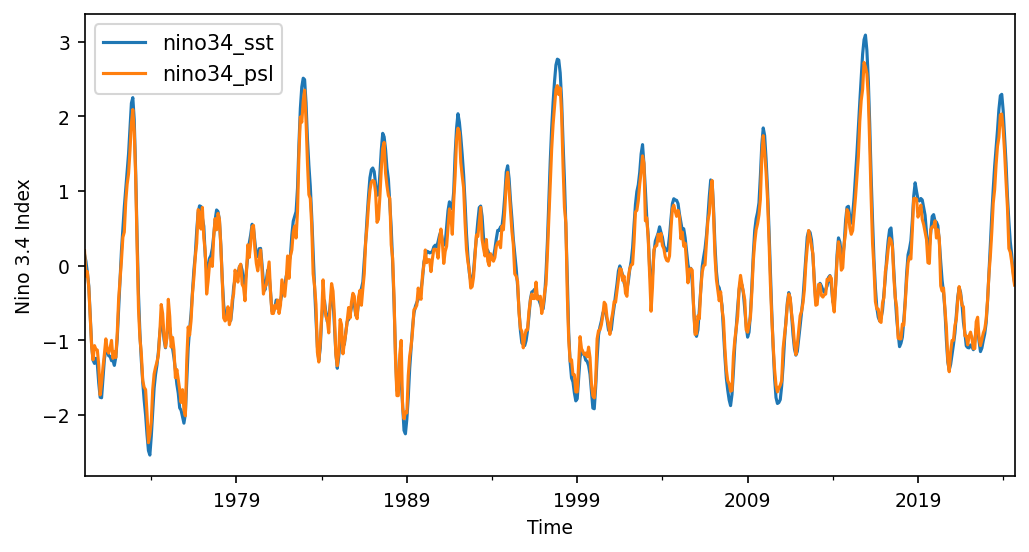

<Figure size 640x480 with 0 Axes>

In [13]:
data = pd.merge(nino34_normalized, nino_ts, left_index=True, right_index=True, how='inner')
fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
data[data.index > '1970-01-01'].plot(ax=ax)
ax.set_ylabel('Nino 3.4 Index', fontsize=9)
ax.set_xlabel('Time', fontsize=9)
ax.tick_params(axis='both', labelsize=9)
plt.show()
plt.tight_layout()